/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


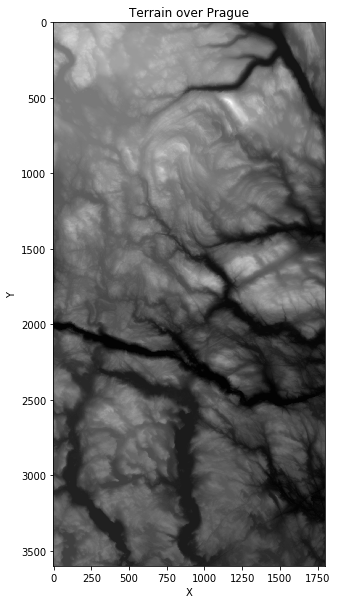

In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from functions1 import *
%matplotlib inline
# Load the terrain
terrain1 = imread('data/SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure(figsize=(20,10))
plt.title('Terrain over Prague')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
print(terrain1)

In [ ]:
print(np.size(terrain1,0))

In [ ]:
print(terrain1[0:10,0:10])

In [2]:
x = np.arange(0, 1801, 1)
y = np.arange(3600, -1, -1)
#x = np.random.rand(100,1)
#y = np.random.rand(100,1)
#print(x[0:450])
#print(y)
x, y = np.meshgrid(x,y)


In [17]:
x1=np.log(x[1:225,1:450])
y1=np.log(y[1:225,1:450])
z1=(terrain1[1:225,1:450])

In [4]:
print(z1)

[[1171 1174 1176 ... 1203 1199 1196]
 [1173 1176 1179 ... 1200 1196 1193]
 [1176 1177 1182 ... 1198 1193 1191]
 ...
 [1400 1409 1413 ... 1218 1218 1219]
 [1398 1409 1416 ... 1217 1217 1217]
 [1391 1407 1414 ... 1217 1217 1217]]


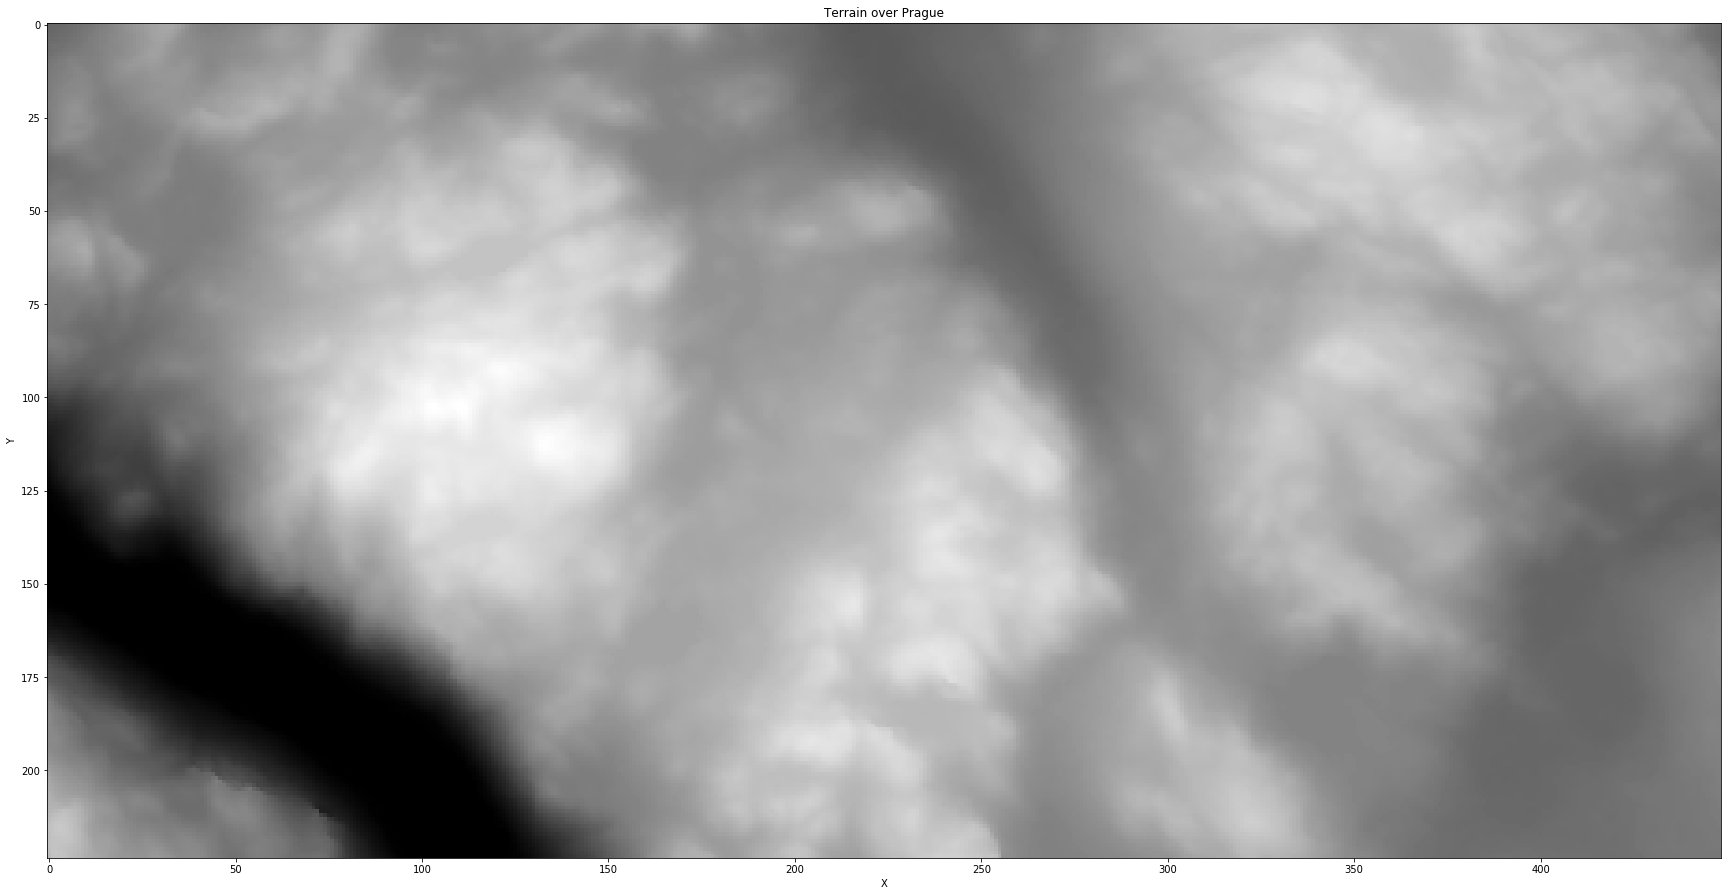

In [12]:
plt.figure(figsize=(30,20))
plt.title('Terrain over Prague')
plt.imshow(z1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


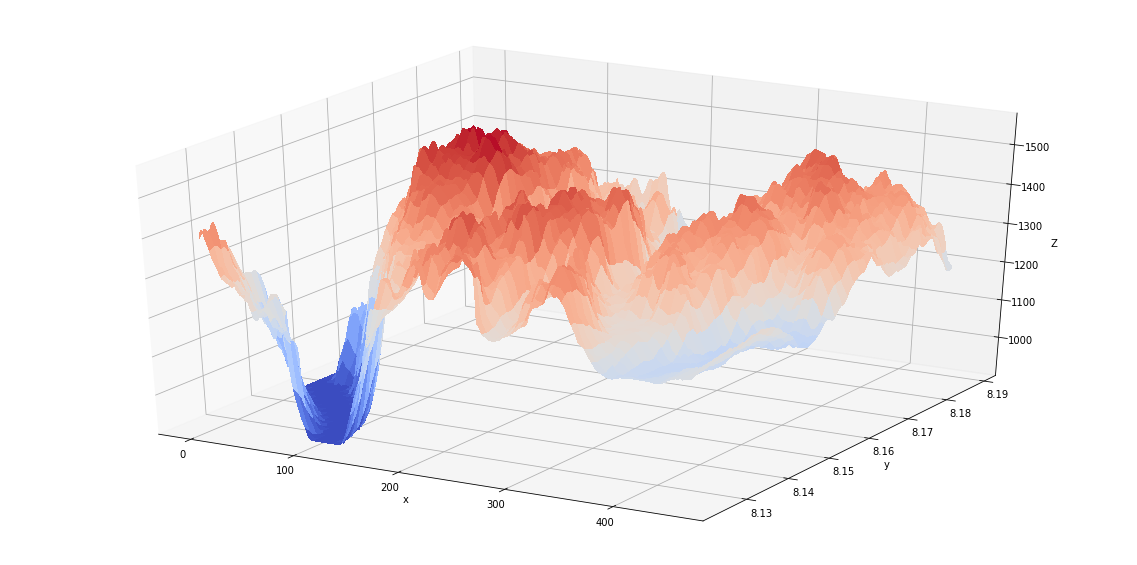

In [13]:
p1=plotTheSurface(x1,y1,z1)
p1.show()

In [18]:

xVector=np.matrix.flatten(x1)
yVector=np.matrix.flatten(y1)
#vectorSize=np.size(yVector,0)
zVector=np.matrix.flatten(z1)
vectorSize=np.size(yVector,0)
matrixSizey=np.size(y1,1)
matrixSizex=np.size(x1,0)


In [ ]:

print(matrixSizey)

In [ ]:
print(matrixSizex)

In [19]:
beta,xx=OSLregression(xVector,yVector,zVector,5)
        #zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
zPredictmatrix=computeZpredict(xVector,yVector,beta,5)
statsMatrix=MSE(zVector,zPredictmatrix)
statsMatrix1=r2score(zVector,zPredictmatrix)

9802.522553053926
0.42227151427957377


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


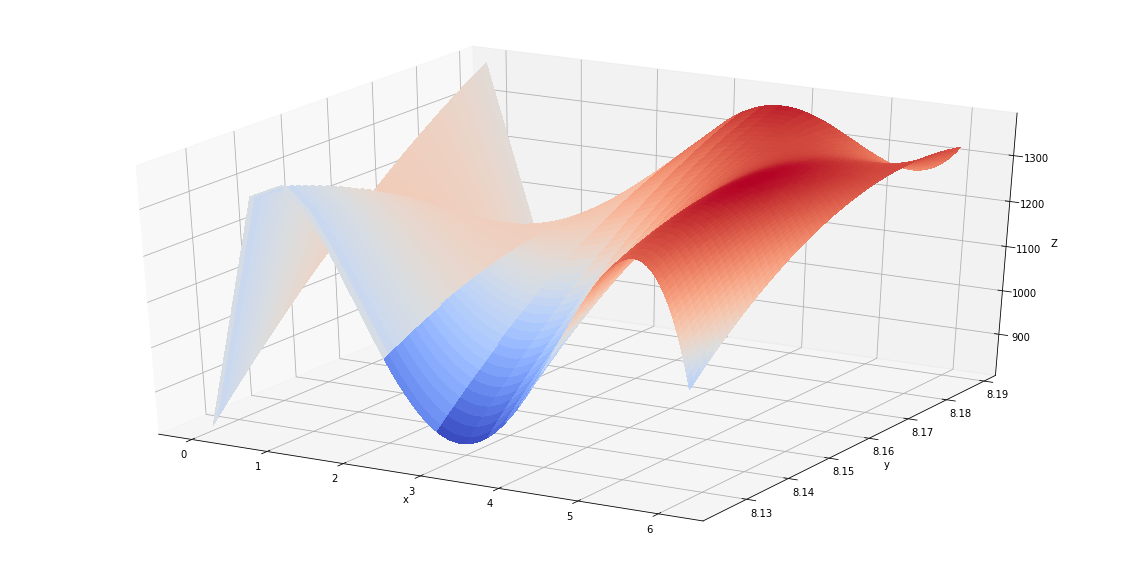

In [20]:
print(statsMatrix)
print(statsMatrix1)
zPredictReshape=np.reshape(zPredictmatrix,(matrixSizex,matrixSizey))

fig1=plotTheSurface(x1,y1,zPredictReshape)
fig1.show()

In [10]:
print(zPredictReshape)

[[1187.09590914 1188.71819245 1190.3672021  ... 1214.07612743
  1209.52912499 1204.87202589]
 [1186.45796273 1188.08099917 1189.73073897 ... 1213.96104562
  1209.40798394 1204.7446991 ]
 [1185.81960366 1187.44339047 1189.09385768 ... 1213.84328733
  1209.28415372 1204.61467039]
 ...
 [1038.2288001  1039.95518693 1041.70353445 ... 1127.16903366
  1120.97596641 1114.64343133]
 [1037.52858614 1039.25518064 1041.00371567 ... 1126.51089184
  1120.30898218 1113.9674653 ]
 [1036.82821291 1038.5550129  1040.30373326 ... 1125.85050035
  1119.63973578 1113.28922453]]


In [21]:
#transforming to a coluum vector in order to form an x_hat matrix
#xVector=xVector[0:200]
#yVector=yVector[0:200]
#vectorSize=np.size(yVector,0)
#zVector=zVector[0:200]
sizeVector=np.size(zVector)
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)

polynom_oders=[2,3,4,5]

In [22]:
zPredictmatrix,statsMatrix=olsModel(polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)

STATS of MSE for polynom order 2 is:
DescribeResult(nobs=10, minmax=(12674.028923272474, 13397.176117118846), mean=13057.543800030155, variance=42666.63846577233, skewness=-0.16689679792915302, kurtosis=-0.43767065970140884)
STATS of R2score for polynom order 2 is:
DescribeResult(nobs=10, minmax=(0.21785165824429853, 0.2411049619348331), mean=0.23025865652239919, variance=6.467391035630151e-05, skewness=-0.23750079325058307, kurtosis=-1.2403381959953421)


STATS of MSE for polynom order 3 is:
DescribeResult(nobs=10, minmax=(11645.556807487666, 12292.576101691408), mean=12031.495252120589, variance=43922.09772719049, skewness=-0.5630847707436124, kurtosis=-0.7840439906073171)
STATS of R2score for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.2683556275365281, 0.30191487252140714), mean=0.29072883382591297, variance=0.00010976940697822874, skewness=-1.0315191442097362, kurtosis=0.0002022957529792535)


STATS of MSE for polynom order 4 is:
DescribeResult(nobs=10, minmax=(10808.552

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


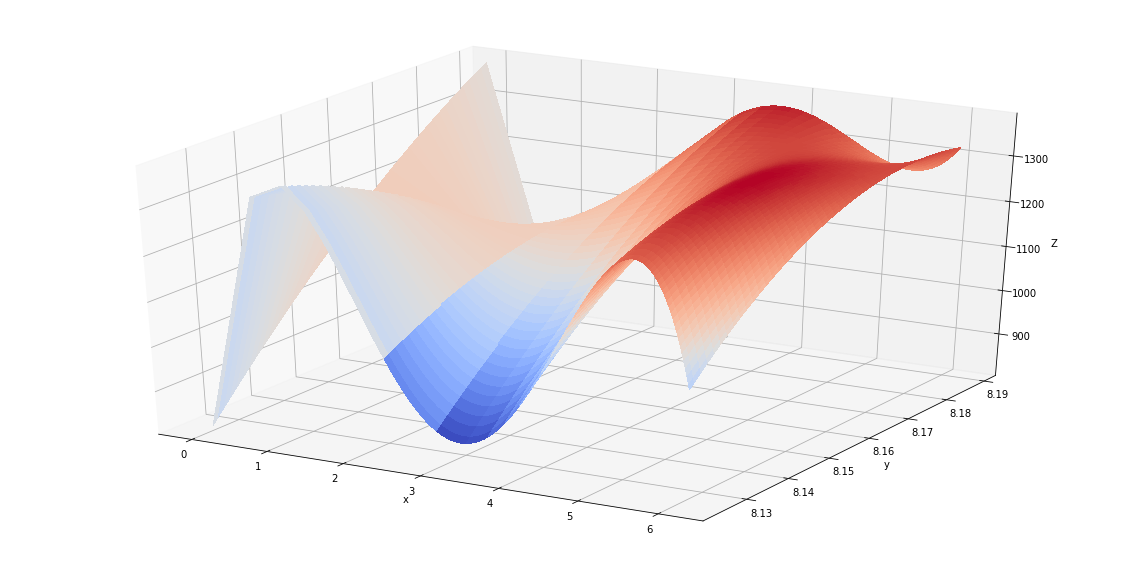

In [23]:
z_pred=np.mean(zPredictmatrix[:,:,3],1)

zPredictReshape=np.reshape(z_pred,(matrixSizex,matrixSizey))

fig1=plotTheSurface(x1,y1,zPredictReshape)
fig1.show()

In [ ]:
plt.figure(figsize=(30,20))
plt.title('Terrain over Prague')
plt.imshow(zPredictReshape, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
lambda_values=[1e-3,1e-2,1e-1,1,10,1e2]
zPredictmatrix,statsMatrix=ridge_regress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

In [ ]:
z_pred=np.mean(zPredictmatrix[:,:,5,3],1)

zPredictReshape=np.reshape(z_pred,(matrixSizex,matrixSizey))

fig1=plotTheSurface(x1,y1,zPredictReshape)
fig1.show()

In [ ]:
lambda_values=[1e-3,1e-2,1e-1,1,10]
zPredictmatrix,statsMatrix=lassoRegress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

In [ ]:
z_pred=np.mean(zPredictmatrix[:,:,0,3],1)

zPredictReshape=np.reshape(z_pred,(matrixSizex,matrixSizey))

fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
x11=[xVector,yVector]
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x11)
clf3 = LinearRegression()
clf3.fit(X,zVector)
zz=clf3.predict(X)
#Xplot=poly3.fit_transform(x)
#poly3_plot=plt.plot(x, clf3.predict(Xplot), label='Cubic Fit')
#plt.plot(x,yn, color='red', label="True Cubic")
#plt.scatter(x, y, label='Data', color='orange', s=15)
#plt.legend()
#plt.show()

In [ ]:
fig1=plotTheSurface(x1,y1,zz)
fig1.show()

In [ ]:
print(x)